In [63]:
import pandas as pd

In [64]:
project_data = pd.read_csv("C:/Users/Revathy.S/Downloads/NLP-Disaster_Management/nlp-getting-started/train.csv")

In [65]:
print("number of data points" , project_data.shape)

number of data points (7613, 5)


In [66]:
project_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [67]:
loc_list = list(project_data['location'].values)
loc_list[0:5]

[nan, nan, nan, nan, nan]

In [68]:
tweets = list(project_data['text'].values)

In [69]:
tweets

['Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all',
 'Forest fire near La Ronge Sask. Canada',
 "All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected",
 '13,000 people receive #wildfires evacuation orders in California ',
 'Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school ',
 '#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires',
 '#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas',
 "I'm on top of the hill and I can see a fire in the woods...",
 "There's an emergency evacuation happening now in the building across the street",
 "I'm afraid that the tornado is coming to our area...",
 'Three people died from the heat wave so far',
 'Haha South Tampa is getting flooded hah- WAIT A SECOND I LIVE IN SOUTH TAMPA WHAT AM I GONNA DO WHAT AM I GONNA 

In [84]:
import sqlite3
import pandas as pd
import numpy as np
from numpy import nan
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

#from gensim.models import Word2Vec
#from gensim.models import KeyedVectors
import pickle

#from tqdm import tqdm
import os


#import chart_studio.plotly as plotly
#import plotly.offline as offline
#import plotly.graph_objs as go
#offline.init_notebook_mode()
from collections import Counter
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
#from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
#warnings.filterwarnings("ignore")

#from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

In [71]:
tweets_list = []
for i in tweets:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
    tweets_list.append(temp.strip())

#project_data.drop(['text'], axis = 0, inplace=True)
#del project_data['text']
project_data['text'] = tweets_list

In [72]:
project_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,OurDeedsaretheReasonofthis#earthquakeMayALLAHF...,1
1,4,NaN,NaN,ForestfirenearLaRongeSask.Canada,1
2,5,NaN,NaN,Allresidentsaskedto'shelterinplace'arebeingnot...,1
3,6,NaN,NaN,13 000peoplereceive#wildfiresevacuationordersi...,1
4,7,NaN,NaN,JustgotsentthisphotofromRuby#Alaskaassmokefrom...,1


In [42]:
from collections import Counter
my_counter = Counter()
for word in project_data['text'].values:
    my_counter.update(word.split())

cuisine_dict = dict(my_counter)
sorted_cuisine_dict = dict(sorted(cuisine_dict.items(), key=lambda kv: kv[1]))

In [74]:
project_data.keyword.unique()

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned', 'burning',
       'burning%20buildings', 'bush%20fires', 'casualties', 'casualty',
       'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'der

In [76]:
y = project_data['target'].values
X = project_data.drop(['target'], axis=1)
X.head(3)

# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

In [79]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cuisine_dict.keys()), lowercase=False, binary=True)
X_train_cuisine_ohe = vectorizer.fit_transform(X_train['text'].values)

X_test_cuisine_ohe = vectorizer.transform(X_test['text'].values)

print("After vectorizations")
print(X_train_cuisine_ohe.shape, y_train.shape)
print(X_test_cuisine_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(5100, 8172) (5100,)
(2513, 8172) (2513,)
['OurDeedsaretheReasonofthis#earthquakeMayALLAHForgiveusall', 'ForestfirenearLaRongeSask.Canada', "Allresidentsaskedto'shelterinplace'arebeingnotifiedbyofficers.Nootherevacuationorshelterinplaceordersareexpected", '13', '000peoplereceive#wildfiresevacuationordersinCalifornia', 'JustgotsentthisphotofromRuby#Alaskaassmokefrom#wildfirespoursintoaschool', '#RockyFireUpdate=>CaliforniaHwy.20closedinbothdirectionsduetoLakeCountyfire-#CAfire#wildfires', '#flood#disasterHeavyraincausesflashfloodingofstreetsinManitou', 'ColoradoSpringsareas', "I'montopofthehillandIcanseeafireinthewoods...", "There'sanemergencyevacuationhappeningnowinthebuildingacrossthestreet", "I'mafraidthatthetornadoiscomingtoourarea...", 'Threepeoplediedfromtheheatwavesofar', 'HahaSouthTampaisgettingfloodedhah-WAITASECONDILIVEINSOUTHTAMPAWHATAMIGONNADOWHATAMIGONNADOFVCK#flooding', "#raining#flooding#Florida#TampaBay#Tampa18or19days.I'velostcount", '#FloodinBagoMy

In [80]:
X_tr1 = pd.DataFrame(X_train_cuisine_ohe.toarray(), columns=vectorizer.get_feature_names())
X_te1 = pd.DataFrame(X_test_cuisine_ohe.toarray(), columns=vectorizer.get_feature_names())

For values of alpha =  1e-05 The log loss is: 0.681393532585
For values of alpha =  0.0001 The log loss is: 0.681416504937
For values of alpha =  0.001 The log loss is: 0.681723758035
For values of alpha =  0.01 The log loss is: 0.681839030729
For values of alpha =  0.1 The log loss is: 0.681916784262
For values of alpha =  1 The log loss is: 0.681939050702


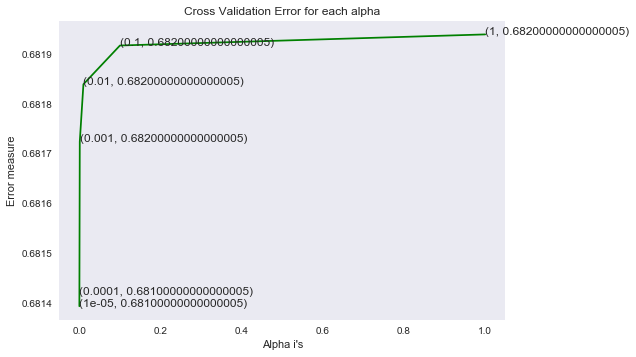

For values of best alpha =  1e-05 The train log loss is: 0.662257674877
For values of best alpha =  1e-05 The test log loss is: 0.681393532585


In [85]:
alpha = [10 ** x for x in range(-5, 1)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train_cuisine_ohe, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_cuisine_ohe, y_train)
    predict_y = sig_clf.predict_proba(X_test_cuisine_ohe)
    cv_log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train_cuisine_ohe, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_cuisine_ohe, y_train)

predict_y = sig_clf.predict_proba(X_train_cuisine_ohe)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_cuisine_ohe)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


for alpha = 5
Log Loss : 0.682236465377
for alpha = 11
Log Loss : 0.682545216075
for alpha = 15
Log Loss : 0.682820858733
for alpha = 21
Log Loss : 0.683482831492
for alpha = 31
Log Loss : 0.683846717084
for alpha = 41
Log Loss : 0.683600928035
for alpha = 51
Log Loss : 0.683301963585
for alpha = 99
Log Loss : 0.683159885101


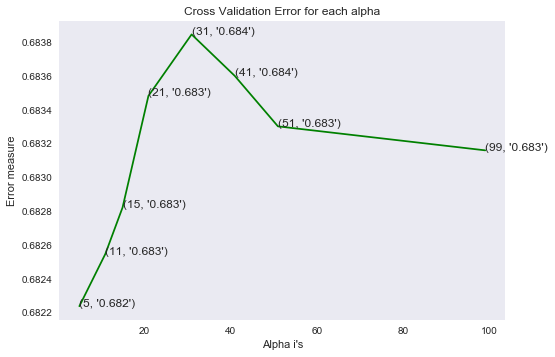

For values of best alpha =  5 The train log loss is: 0.682218792998
For values of best alpha =  5 The test log loss is: 0.682236465377


In [96]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/
#-------------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------


alpha = [5, 11, 15, 21, 31, 41, 51, 99]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_tr1, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_tr1, y_train)
    sig_clf_probs = sig_clf.predict_proba(X_te1)
    cv_log_error_array.append(log_loss(y_test, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_test, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(X_tr1, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_tr1, y_train)

predict_y = sig_clf.predict_proba(X_tr1)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_te1)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
